# 1. Model Based Collaborative Filtering(MBCF)
## 1.1 NBCF의 한계
**Sparsity & Scalability Issue**

1. Sparsity(희소성) 문제
- 데이터가 충분하지 않다면 추천 성능이 떨어진다.(유사도 계산이 부정확하다)
- 데이터가 부족하거나 혹은 아예 없는 유저, 아이템의 경우 추천이 불가능하다.(Cold start)


2. Scalability(확정성) 문제
- 유저와 아이템이 늘어날수록 유사도 계산이 늘어난다.
- 유저, 아이템이 많아야 정확한 예측을 하지만 반대로 시간이 오래 걸린다.

## 1.2 Model Based Collaborative Filtering
**모델 기반 협업 필터링(Model Based Collaborative Filtering, MBCF)**

항목 간 유사성을 단순 비교하는 것에서 벗어나 데이터에 내재한 패턴을 이용해 추천하는 CF 기법
- Parametric Machine Learning을 사용한다.
- 주어진 데이터를 사용하여 모델을 학습한다.
- 데이터 정보가 파라미터 형태로 모델에 압축된다.
- 모델의 파라미터는 데이터의 패턴을 나타내고, 최적화를 통해 업데이트 된다.

**MBCF의 특징**

데이터에 숨겨진 유저-아이템 관계의 잠재적 특성/패턴을 찾는다.

- vs. NBCF

: 이웃 기반 CF는 유저/아이템 벡터를 데이터를 통해 계산된 형태로 저장(a.k.a Memory-based CF).

Model-based CF의 경우 유저, 아이템 벡터는 모두 학습을 통해 변하는 파라미터이다.


- 현업에서는 Matrix Factorization 기법이 가장 많이 사용된다.

특히, 최근에는 MF 원리를 DL 모델에 응용하는 기법이 높은 성능을 낸다.

**MBCF의 장점(vs. NBCF)**

1. 모델 학습/서빙
- 유저-아이템 데이터는 학습에만 사용되고 학습된 모델은 압축된 형태로 저장된다.
- 이미 학습된 모델을 통해 추천하기 때문에 서빙 속도가 빠르다.


2. Sparsity / Scalability 문제 개선
- 이웃 기반 CF에 비해 sparse한 데이터에서도 좋은 성능을 보인다.(NBCF와 달리 Sparsity Ratio가 99.5%가 넘을 경우에도 사용한다.)
- 사용자, 아이템 개수가 많이 늘어나도 좋은 추천 성능을 보인다.

3. Overfitting 방지
- 이웃 기반 CF와 비교했을 때 전체 데이터의 패턴을 학습하도록 모델이 작동한다.
- NBCF의 경우 특정 주변 이웃에 의해 크게 영향을 줄 수 있다.


4. Limited Coverage 극복
- 이웃 기반 CF의 경우 공통의 유저 / 아이템을 많이 공유해야만 유사도 값이 정확해진다.
- NBCF의 유사도 값이 정확하지 않은 경우 이웃의 효과를 보기 어렵다.

## 1.3 또 다른 이슈 : Implicit Feedback
**Implicit Feedback (vs. Explicit Feedback)**

- Explicit feedback
    - 영화 평점, 맛집 별점 등 item에 대한 user의 선호도를 직접적으로 알 수 있는 데이터이다.
    

- Implicit feedback
    - 클릭 여부, 시청 여부 등 item에 대한 user의 선호도를 간접적으로 알 수 있는 데이터이다.
    - 유저-아이템 간 상호작용이 있었다면 1(positive)을 우너소로 갖는 행렬로 표현 가능하다.
    - 현실에서는 implicit feedback 데이터의 크기가 훨씬 크고 많이 사용된다.
    
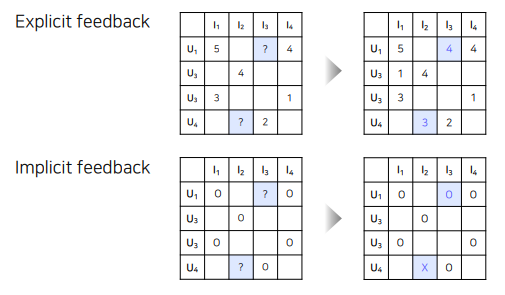

## 1.4 Latent Factor Model
**Latent Factor Model의 의미**

1. 유저와 아이템 관계를 잠재적 요인으로 표현할 수 있다고 보는 모델이다.
- 다양하고 복잡한 유저와 아이템의 특성을 몇 개의 벡터로 compact하게 표현한다.


2. 유저-아이템 행렬을 저차원의 행렬로 분해하는 방식으로 작동한다.
- 각 차원의 의미는 모델 학습을 통해 생성되며 표면적으로는 알 수 없다.


3. 같은 벡터 공간에서 유저와 아이템 벡터가 놓일 경우 유저와 아이템의 유사한 정도를 확인할 수 있다.
- 유저 벡터와 아이템 벡터가 유사하게 놓인다면 해당 유저에게 해당 아이템이 추천될 확률이 높다.

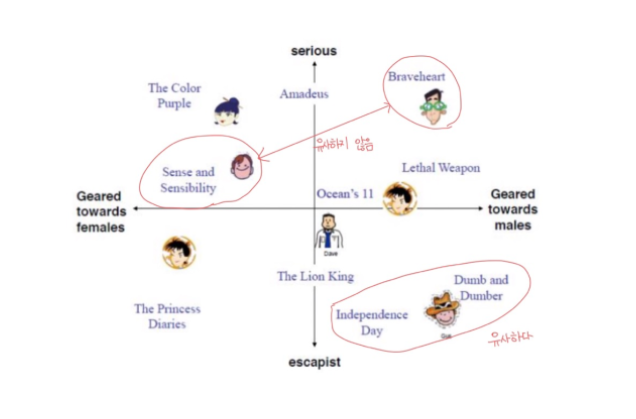

# 2. Singular Value Decomposition(SVD)
## 2.1 SVD의 개념
**Singular Vector Decomposition(SVD)**

- Rating Matrix R에 대해 유저와 아이템의 잠재 요인을 포함할 수 있는 행렬로 분해함.
    - 유저 잠재 요인 행렬
    - 잠재 요인 대각행렬
    - 아이템 잠재 요인 행렬


- 선형 대수학에서 차원 축소 기법 중 하나로 분류된다.
    - 주성분분석(PCA)도 차원 축소 기법 중 하나

## 2.2 SVD 원리 이해
**Full SVD: $R = U\sum V^T$**

- $U$ : 유저와 Latent Factor의 관계
    - $U$의 열벡터는 $R$의 left singular vector
    
    
- $V$ : 아이템과 Latent Factor의 관계
    - $V$의 열벡터는 $R$의 right singular vector
    
    
- $\sum$ : Latent Factor의 중요도를 나타낸다.
    - $RR^T$를 고유값 분해해서 얻은 직사각 대각 행렬로 대각 원소들은 $R$의 singular value(특이치)이다.
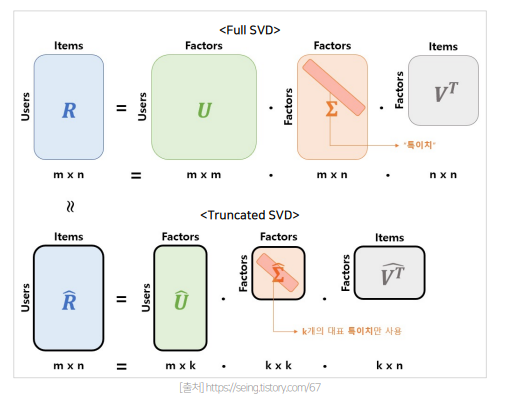

**Truncated SVD : $R \approx \hat{U}\sum_k\hat{V^T} = \hat{R}$**

대표값으로 사용될 k개의 특이치만 사용한다.

- $\hat{R}$은 축소된 $\hat{U}, \hat{V^T}, \sum_k$에 의해 계산된다.
    - 몇 개의 특이치만을 가지고도 유용한 정보를 유지한다.
    - 분해된 행렬이 부분 복원되면서 가장 중요한 정보로 요약된다는 개념이다.
    

- 각각의 K개의 Latent Factor는 유추할 수 있을 뿐 정확히 무엇을 의미하는지 알 수 없다.

## 2.3 SVD의 한계
**SVD의 한계점**
- 분해(Decomposition)하려는 행렬의 Knowledge가 불완전할 때 정의되지 않았다.
    - Sparsity가 높은 데이터의 경우 결측치가 매우 많고, 실제 데이터는 대부분 Sparse Matrix이다.
    
    
- 따라서 결측된 entry를 모두 채우는 Imputation을 통해 Dense Matrix를 만들어 SVD를 수행한다.
    - ex) 결측된 entry를 0 or 유저/아이템의 평균 평점으로 채운다.
    - => Imputation은 데이터의 양을 상당히 증가시키므로 Computation 비용이 높아진다.
    
    
- 정확하지 않은 Imputation은 데이터를 왜곡시키고 예측 성능을 떨어뜨린다.
    - 행렬의 entry가 매우 적을 때 SVD를 적용하면 과적합 되기 쉽다.
    
**SVD의 원리를 차용하되, 다른 접근 방법이 필요하다 ==> MF가 등장!**

# 3. Matrix Factorization(MF)
## 3.1 MF 문제 정의
**Matrix Factorization(MF)**

User-Item 행렬을 저차원의 User와 Item의 Latent Factor 행렬의 곱으로 분해하는 방법

SVD의 개념과 유사하나, *관측된 선호도(평점)*만 모델링에 활용하여, *관측되지 않은 선호도*를 예측하는 일반적인 모델을 만드는 것이 목표이다.

Rating Matrix를 P(유저 행렬)와 Q(아이템 행렬)로 분해하여 R과 최대한 유사하게 $\hat{R}$을 추론(최적화)한다.

- $R \approx P \times Q^T = \hat{R} $

**기본 MF 모델**

$R$과 $\hat{R}$이 최대한 유사하도록 모델을 학습하는 과정이다.
- $R \approx P \times Q^T = \hat{R}$
- $P \to |U| \times k$
- $Q \to |I| \times k$


Objective Function을 정의하고 최적화 문제를 푸는 것
- true rating : $r_{u,i}$
- predicted rating : $\hat{r_{u,i}} = p^{T}_{u}qi$
- $\min_{P,Q}\sum_{obs\ r_{u,i}}(r_{u,i}-p_u^Tq_i)^2$
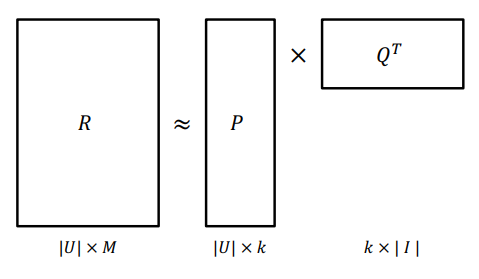

**Objective Function**

$\min_{P,Q}\sum_{obs\ r_{u,i}}(r_{u,i}-p_u^Tq_i)^2 + \lambda(||p_u||_2^2 + ||q_i||_2^2)$

- $r_{u,i}$ : 학습 데이터에 있는 유저 u의 아이템 i에 대한 실제 rating
- $p_u(q_i)$ : 유저(아이템) u(i)의 latent vector. 이는 최적화 문제를 통해 업데이트 되는 파라미터
- $\lambda$(상수)배 된 penalty term은 L2-정규화(regularization)를 의미한다. 학습 데이터에 과적합되는 것을 방지한다.

## 3.2 MF 학습
**확률적 경사하강법(Stochastic Gradient Descent, SGD)**
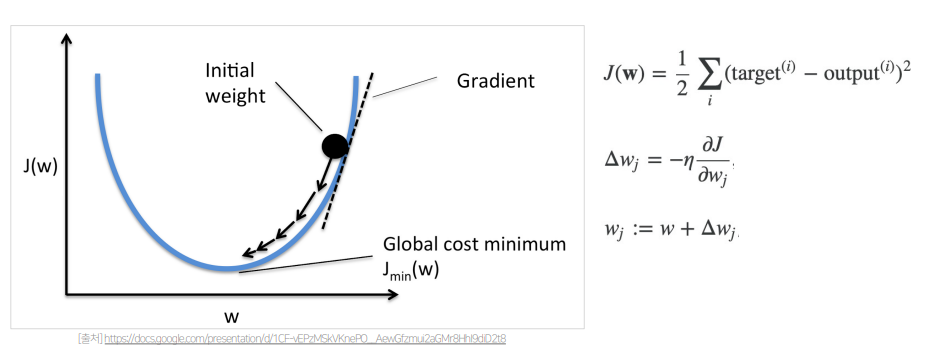

**MF 모델에서의 SGD**
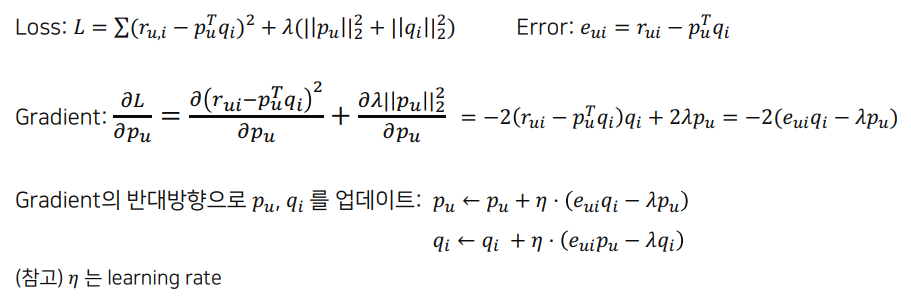

## 3.3 Matrix Factorization + $\alpha$
**Adding Biases**

어떤 유저는 모든 영화에 대해서 평점을 짜게 줄 수도 있다 -> 전체 평균, 유저/아이템의 bias를 추가하여 예측 성능을 높임
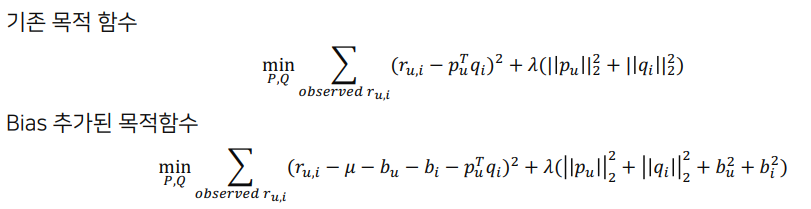

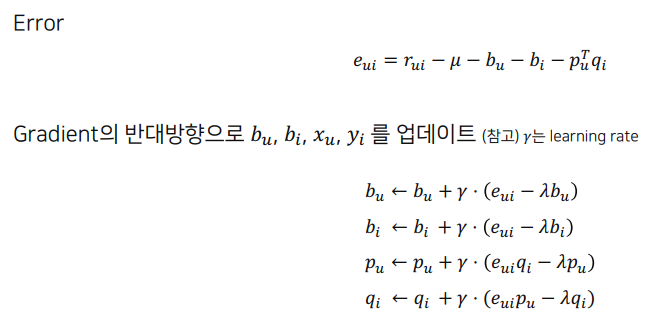

**Adding Confidence Level**

모든 평점이 동일한 신뢰도를 갖지 않는다. $r_{u,i}$에 대한 신뢰도를 의미하는 $c_{u,i}$ 추가
- 대규모 광고 집행과 같이 특정 아이템이 많이 노출되어 클릭되는 경우
- 유저의 아이템에 대한 평점이 정확하지 않은 경우(Implicit Feedback)
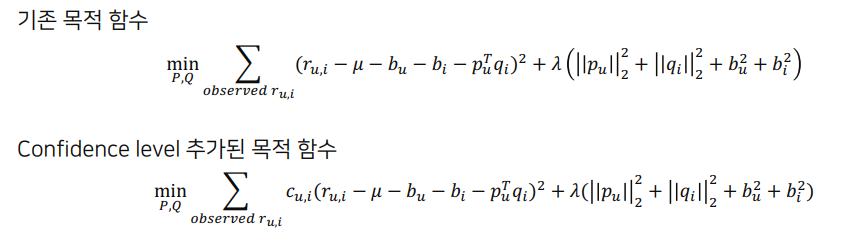

**Adding Temporal Dynamics**
- 시간에 따라 변하는 유저, 아이템의 특성을 반영하고 싶다.
    - 아이템이 시간이 지남에 따라 인기도가 떨어진다.
    - 유저가 시간이 흐르면서 평점을 내리는 기준이 엄격해진다.
    
    
- 시간을 반영한 평점 예측
    - 학습 파라미터가 시간을 반영하도록 모델을 설계한다.
    - $\hat{r_{ui}(t)} = \mu + b_u(t) + b_i(t) + p_u^Tq_i(t)$
    - ex) $b_u(t) = b_u + \alpha _u \cdot sign(t-t_u) \cdot |t-t_u|^\beta$

# 4. MF for Implicit Feedback
## 4.1 Alternative Least Square(ALS)
- Collaborative Filtering for Implicit Feedback Datasets
    - Implicit Feedback 데이터에 적합하도록 MF 기반 모델을 설계하여 성능을 향상시킨 논문.

**Alternative Least Square(ALS)**
- Basic Concept
    - 유저와 아이템 매트릭스를 번갈아가면서 업데이트 한다.
    - 두 매트릭스 중 하나를 상수로 놓고 나머지 매트릭스를 업데이트 한다.
    - $p_u, g_i$ 가운데 하나를 고정하고 다른 하나로 leaset-square 문제를 푸는 것이다.
    
    
- SGD와의 비교
    - Sparse한 데이터에 대해 SGD보다 더 Robust하다.
    - 대용량 데이터를 병렬 처리하여 빠른 학습이 가능하다.

**ALS 목적합수**
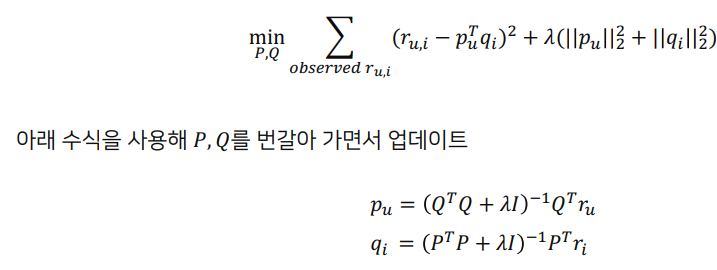

## 4.2 MF for Implicit Feedback
**Implicit Feedback 고려**
- Preference
    - 유가 u가 아이템 i를 선호하는지 여부를 binary로 표현
    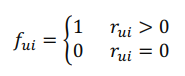
    
- Confidence
    - 유저 u가 아이템 i를 선호하는 정도를 나타내는 increasing function
    - $\alpha$는 positive feedback과 negative feedback 간의 상대적인 중요도를 조정하는 하이퍼 파라미터
    - $c_{ui} = 1 + \alpha \cdot r_{ui}$

**Implicit Feedback을 고려한 목적 함수**
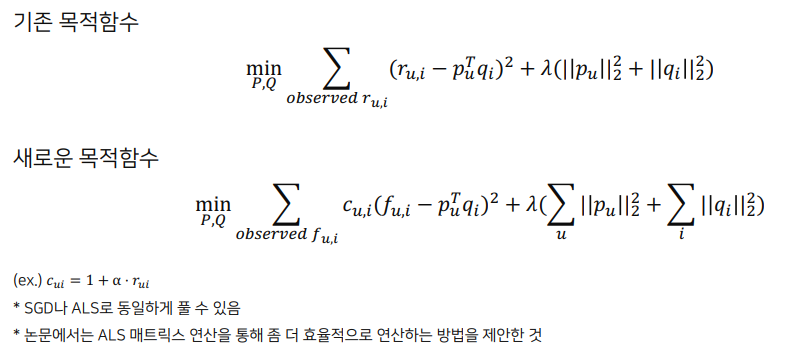

**Solution**
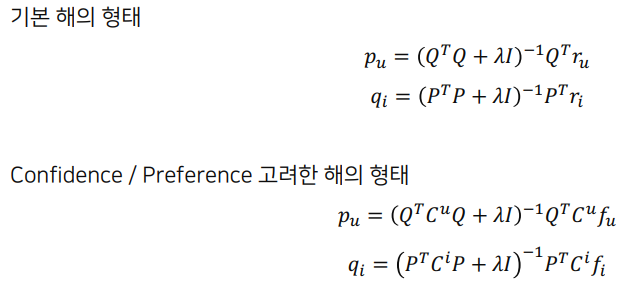

# 5. Bayesian Personalized Ranking
## 5.1 Bayesian Personalized Ranking의 개념
**Personalized Ranking**

사용자에게 순서(Ranking)가 있는 아이템 리스트를 제공하는 문제
- 아이템 추천 문제


Personalized Ranking을 반영한 최적화
- 유저가 item i보다 j를 좋아한다면 이 정보를 사용해 MF의 파라미터를 학습한다.
- 유저 u에 대해 item i > item j 라면 이는 유저 u의 Personalized Ranking

사용자의 클릭, 구매 등의 로그는 Implicit Feedback 데이터
- 평점과 같이 아이템에 대한 선호의 정도가 분명하게 드러나지 않음
- Implicit Feedback 추천 시스템은 관측된 데이터(positive observation)만 존재한다.


관측되지 않은 데이터에 대해서 아래 두 가지를 모두 고려한다.
- 유저가 아이템에 관심이 없는 것인가
- 유저가 실제로 관심이 있지만 아직 모르느 ㄴ것이다.

=> 유저에 아이템에 대한 선호도 랭킹을 생성하여 이를 Mf의 학습 데이터로 사용한다.

**접근**

가정
- 관측된 item을 관측되지 않은 item보다 선호한다.
- 관측된 아이템끼리는 선호도를 추론할 수 없다.
- 관측되지 않은 아이템끼리도 선호도를 추론할 수 없다.

특징
- 관측되지 않은 item들에 대해서도 정보를 부여하여 학습한다.
- 관측되지 않은 item들에 대해서도 ranking이 가능하다.
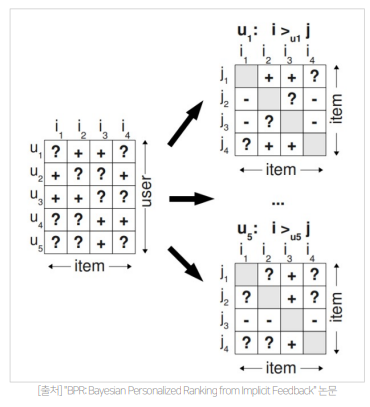

접근
- 학습 데이터 생성
    - 유저 u가 선호하는 아이템들을 $I_u^+$라고 하면, $D_s:=\{(u,i,j)|i\in I_u^+ \wedge j \in I \backslash I_u^+\}$
    
    
- 유저 $u_1$의 선호도 데이터 예시
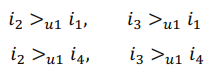

**최대 사후 확률 추정(Maximum A Posterior)**
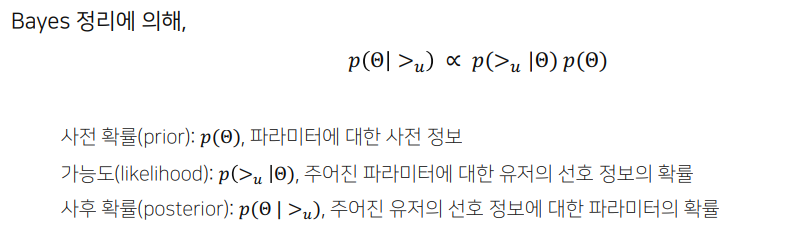
Posterior를 최대화 한다는 것 -> 주어진 유저 선호 정보를 최대한 잘 나타내는 파라미터를 추정하는 것.

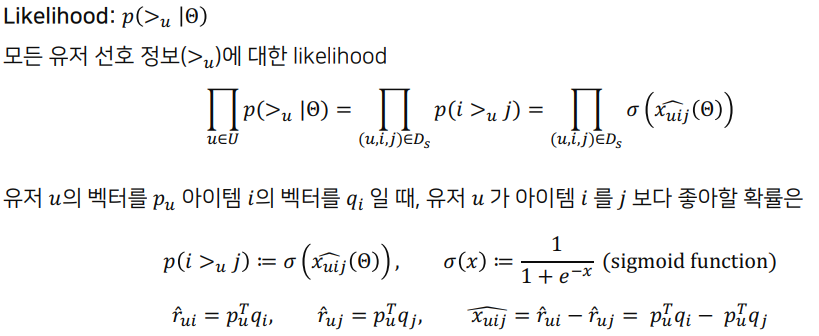

Prior : $p(\theta)$

파라미터에 대한 사전 확률은 정규분포를 따른다고 가정
- 평균이 모두 0이고 공분산 행렬이 $\sum_\theta$인 정규분포
- 공분산 행렬 $\sum_\theta$는 $\lambda_\theta I$로 설정하여 하이퍼 파라미터의 계수를 조정한다.
- $p(\theta) \sim N(0, \sum_\theta) = N(0,\lambda_\theta I)$

**BPR 목적함수**
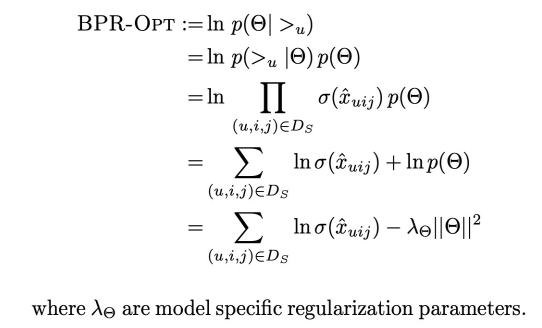

**LEARNBPR**

OBJECTIVE인 brp-opt는 미분가능하기 때문에 Gradient Descent로 Optimization을 수행한다.

그러나 일반적인 Gradient Descent가 적절한 학습 방법이 아니다.
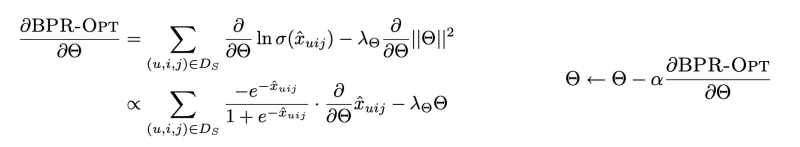

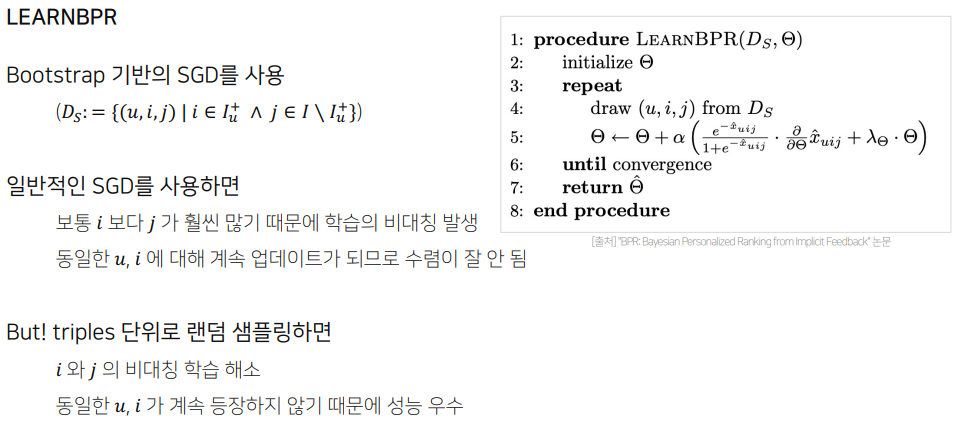

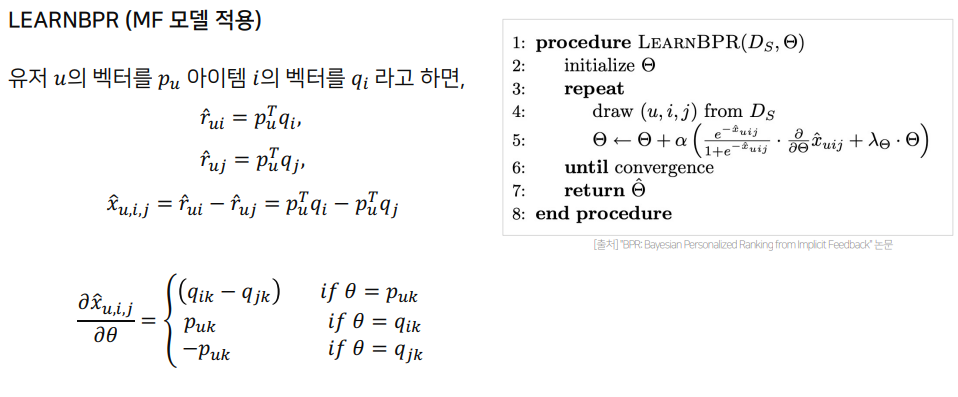

**BPR 요약**
- Implicit Feedback 데이터만을 활용해 아이템 간의 선호도 도출
- Maximum A Posterior 방법을 통해 파라미터를 최적화
- LEARNBPR이라는 Bootstrap 기반의 SGD를 활용해 파라미터를 업데이트
- Matrix Factorization에 BPR Optimization을 적용한 결과 성능 우수